In [103]:
#load packages
import math
import random
import numpy as np
from numpy.random import permutation
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mlab
%matplotlib inline
import scipy.stats as sp
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.neighbors import KNeighborsRegressor
import pylab as pl

In [104]:
#import datasets
df_ws = pd.read_csv('all_players_data.csv', index_col=False, header=0)
df_tm = pd.read_csv('player_data_Sept2017.csv', index_col=0, parse_dates=True)

In [105]:
list(df_ws)

['Player Name',
 'Goals/90min',
 'Assists/90min',
 'Yel/90min',
 'Red/90min',
 'SpG',
 'PS%',
 'Rating',
 'Tackles',
 'Inter',
 'Fouls (def)',
 'Offsides',
 'Clear',
 'DrB (def)',
 'Blocks',
 'DrB (off)',
 'Fouled (off)',
 'Off (off)',
 'Disp (off)',
 'KeyP',
 'AvgP',
 'Crosses',
 'LongB',
 'ThrB',
 'OutOfBox',
 'SixYardBox',
 'PenaltyArea']

In [106]:
df_ws.rename(columns={'Goals/90min': 'GpG'}, inplace=True)
df_ws.rename(columns={'Assists/90min': 'AssistspG'}, inplace=True)
df_ws.rename(columns={'Yel/90min': 'YelCardpG'}, inplace=True)
df_ws.rename(columns={'Red/90min': 'RedCardpG'}, inplace=True)
df_ws.rename(columns={'Fouls (def)': 'Foulsdef'}, inplace=True)
df_ws.rename(columns={'DrB (def)': 'DrBdef'}, inplace=True)
df_ws.rename(columns={'Fouled (off)': 'Fouledoff'}, inplace=True)
df_ws.rename(columns={'DrB (off)': 'DrBoff'}, inplace=True)
df_ws.rename(columns={'Off (off)': 'Offoff'}, inplace=True)
df_ws.rename(columns={'Disp (off)': 'Dispoff'}, inplace=True)



In [107]:
df_ws = df_ws[df_ws.GpG != 'Undefined']
df_ws = df_ws[df_ws.Tackles != 'Undefined']
df_ws = df_ws[df_ws.DrBoff != 'Undefined']
df_ws = df_ws[df_ws.OutOfBox != 'Undefined']

In [108]:
df_ws.head()

,Player Name,GpG,AssistspG,YelCardpG,RedCardpG,SpG,PS%,Rating,Tackles,Inter,...,Offoff,Dispoff,KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
0,Cesar Azpilicueta,0.13,0.34,0.07,0.0,0.3,84.4,7.28,2.4,1.5,...,0.1,0.3,0.5,60.4,0.3,2.5,0.1,0.1,0.1,0.1
1,N Golo Kante,0.1,0.0,0.1,0.0,0.7,86,7.34,3.4,2.1,...,0.1,1,1.2,54.1,0.2,2,0,0.5,0,0.2
2,Tiemoue Bakayoko,0.17,0.25,0.25,0.0,1.3,83.5,7.21,2.9,1.4,...,0.1,1.5,0.6,38.3,0,1.6,0,0.6,0,0.6
3,Alvaro Morata,1.21,0.28,0.19,0.0,3.1,71.1,7.03,0.2,0.1,...,1.2,2.5,0.9,17.8,0,0.7,0,0.7,0.4,2
4,Eden Hazard,1.07,0.24,0.0,0.0,1.7,83.3,7.45,0.2,0,...,0.5,1.5,2.8,33.9,0.3,1.9,0,0.6,0,1.1


In [109]:
df_ws.describe()

,Player Name,GpG,AssistspG,YelCardpG,RedCardpG,SpG,PS%,Rating,Tackles,Inter,...,Offoff,Dispoff,KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,6911,6911,6911,6911,6911,6911,6911,6911,6911,6911,...,6911,6911,6911,6911,6911,6911,6911,6911,6911,6911
unique,6911,258,118,208,77,55,545,247,54,51,...,22,44,40,698,34,126,11,32,10,37
top,Siem de Jong,0.0,0.0,0.0,0.0,0,100,6.74,0,0,...,0,0,0,3,0,0,0,0,0,0
freq,1,3899,4526,2399,6399,1349,83,80,879,1248,...,4183,1413,1480,51,3346,781,5713,2495,5014,2122


In [ ]:
#pd.to_numeric(df_ws, errors='ignore')

In [119]:
#convert who scored data to float instead of string
#df_ws.iloc[:, 1 :] = df_ws.iloc[:, 1 :].astype(float)   

NameError: name 'float64' is not defined

In [122]:
df_ws[['GpG', 'AssistspG', 'YelCardpG', 'RedCardpG', 'SpG', 'PS%', 'Rating', 'Tackles', 'Inter', 'Foulsdef', 'Offsides', 'Clear', 'DrBdef', 'Blocks', 'DrBoff','Fouledoff', 'Offoff', 'Dispoff', 'KeyP', 'AvgP', 'Crosses', 'LongB', 'ThrB', 'OutOfBox', 'SixYardBox', 'PenaltyArea' ]] = df_ws[['GpG', 'AssistspG', 'YelCardpG', 'RedCardpG', 'SpG', 'PS%', 'Rating', 'Tackles', 'Inter', 'Foulsdef', 'Offsides', 'Clear', 'DrBdef', 'Blocks', 'DrBoff','Fouledoff', 'Offoff', 'Dispoff', 'KeyP', 'AvgP', 'Crosses', 'LongB', 'ThrB', 'OutOfBox', 'SixYardBox', 'PenaltyArea']].apply(pd.to_numeric)

In [123]:
list(df_tm)

['Name',
 'date_of_birth',
 'place_of_birth',
 'Age',
 'Height',
 'shoe_size',
 'Nationality',
 'Position',
 'Foot',
 'current_club',
 'current_market_value',
 'highest_market_value',
 'city_of_birth',
 'country_of_birth',
 'birth_country_code',
 'Continent',
 'continent_specific']

In [124]:
#should write code to just replace all periods with underscores in header
#maybe header format?
#make all lowercase?
df_tm = df_tm.rename(columns={'Date.of.birth': 'date_of_birth', 'Place.of.birth': 'place_of_birth','Shoe.size': 'shoe_size', 'Current.club': 'current_club', 'Current.market.value': 'current_market_value', 'Highest.market.value': 'highest_market_value','City.of.birth': 'city_of_birth', 'Country.of.birth': 'country_of_birth', 'Birth.country.code': 'birth_country_code', 'Continent.specific' :'continent_specific' })

In [125]:
df_tm['birth_country_code']

0         BR
1         CL
2         GB
3         AR
4         BE
5         FR
6         BE
7        NaN
8         FR
9         GB
10        BR
11        BR
12        DE
13        GB
14        CI
15        BE
16        ES
17        UA
18        JM
19        DE
20        PT
21        AR
22        BR
23        CI
24        BE
25        AR
26        PT
27        BA
28        BR
29        DE
        ... 
19326     BR
19327     ES
19328    NaN
19329     GR
19330    NaN
19331     CI
19332    NaN
19333     FR
19334     GR
19335     GR
19336     GR
19337     FR
19338     UA
19339     GR
19340     FR
19341     GR
19342     BR
19343     GR
19344     GR
19345     GR
19346     RS
19347     GR
19348     ES
19349     GR
19350     GR
19351     GR
19352    NaN
19353     FR
19354     RU
19355     PL
Name: birth_country_code, Length: 19354, dtype: object

In [129]:
df_tm = df_tm[df_tm.birth_country_code != 'NaN']

In [ ]:
#df_tm['WCAfrica'] = (df_tm['birth_country_code'] == 'AO') or (df_tm['birth_country_code'] == 'BF') or (df_tm['birth_country_code'] == 'BJ') or (df_tm['birth_country_code'] == 'CM') or
                                                          #  (df_tm['birth_country_code'] == 'CV') or (df_tm['birth_country_code'] == 'CF') or  (df_tm['birth_country_code'] == 'TD') or (df_tm['birth_country_code'] == 'CD') or (df_tm['birth_country_code'] == 'CG') or (df_tm['birth_country_code'] == 'CI') or df_tm['birth_country_code'] == 'AO') or (df_tm['birth_country_code'] == 'BF' or     )

In [130]:
#merge the data sets on player name. problem here is that a lot of the 
#go back and sort out the player name merge because especially with west african names there are ' and 
#diff spellings df_ws['Player Name'] = df_ws['Player Name'].str.replace("'", '') NLP
df_all = pd.merge(left=df_tm, right=df_ws, left_on='Name', right_on='Player Name')

In [131]:
df_all.head()

,Name,date_of_birth,place_of_birth,Age,Height,shoe_size,Nationality,Position,Foot,current_club,...,Offoff,Dispoff,KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
0,Ederson,"Aug 17, 1993","Osasco (SP), Brazil",24,1.88,NaN,"Brazil, Portugal",Goalkeeper,left,Manchester City,...,0.0,0.0,0.0,26.9,0.0,3.4,0.0,0.0,0.0,0.0
1,Ederson,"Jan 13, 1986","Parapua, Brazil",31,1.81,NaN,"Brazil, Italy",Midfield - Attacking Midfield,right,Clube de Regatas do Flamengo,...,0.0,0.0,0.0,26.9,0.0,3.4,0.0,0.0,0.0,0.0
2,Ederson,"Mar 13, 1989","Pentecoste, Brazil",28,1.71,NaN,Brazil,Striker - Secondary Striker,right,Atletico Paranaense,...,0.0,0.0,0.0,26.9,0.0,3.4,0.0,0.0,0.0,0.0
3,Claudio Bravo,"Apr 13, 1983","Viluco, Chile",34,1.84,NaN,"Chile, Spain",Goalkeeper,right,Manchester City,...,0.0,0.0,0.0,14.0,0.0,2.0,0.0,0.0,0.0,0.0
4,Claudio Bravo,"Mar 13, 1997",Undefined,20,NaN,NaN,Argentina,Defence - Left-Back,left,Club Atletico Banfield,...,0.0,0.0,0.0,14.0,0.0,2.0,0.0,0.0,0.0,0.0


In [132]:
df_all.describe()

,Height,shoe_size,current_market_value,highest_market_value,GpG,AssistspG,YelCardpG,RedCardpG,SpG,PS%,...,Offoff,Dispoff,KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,6203.000000,139.000000,5.979000e+03,5.991000e+03,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,...,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000
mean,1.815017,9.910072,3.409216e+06,4.896186e+06,0.391748,0.079455,0.401274,0.026606,0.803646,75.564695,...,0.128419,0.713850,0.594961,28.251424,0.284992,2.054178,0.028451,0.347167,0.050454,0.409859
std,0.067497,1.201225,7.177537e+06,8.609531e+06,5.067822,0.182168,3.513067,0.641942,0.786813,12.605144,...,0.243031,0.681346,0.582697,15.455704,0.448037,2.089470,0.077352,0.433317,0.101510,0.482159
min,1.580000,7.500000,2.500000e+04,2.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.770000,9.000000,5.000000e+05,7.000000e+05,0.000000,0.000000,0.000000,0.000000,0.200000,70.800000,...,0.000000,0.100000,0.100000,16.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,1.820000,10.000000,1.000000e+06,2.000000e+06,0.000000,0.000000,0.150000,0.000000,0.600000,77.900000,...,0.000000,0.600000,0.500000,27.400000,0.100000,1.500000,0.000000,0.200000,0.000000,0.300000
75%,1.860000,10.500000,3.000000e+06,5.000000e+06,0.220000,0.110000,0.310000,0.000000,1.100000,83.300000,...,0.200000,1.100000,0.900000,38.500000,0.400000,2.900000,0.000000,0.500000,0.100000,0.600000
max,2.030000,13.000000,1.200000e+08,1.200000e+08,270.000000,4.090000,90.000000,45.000000,7.000000,100.000000,...,2.400000,5.100000,4.200000,101.200000,3.300000,14.300000,1.500000,3.700000,1.000000,4.800000


In [133]:

df_all.loc[df_all['Position'].str.contains('Striker', case=False), 'Position'] = 'Striker'
df_all.loc[df_all['Position'].str.contains('Midfield', case=False), 'Position'] ='Midfielder'
df_all.loc[df_all['Position'].str.contains('Defence', case=False), 'Position'] = 'Defender'

In [134]:
df_all.dtypes

Name                     object
date_of_birth            object
place_of_birth           object
Age                      object
Height                  float64
shoe_size               float64
Nationality              object
Position                 object
Foot                     object
current_club             object
current_market_value    float64
highest_market_value    float64
city_of_birth            object
country_of_birth         object
birth_country_code       object
Continent                object
continent_specific       object
Player Name              object
GpG                     float64
AssistspG               float64
YelCardpG               float64
RedCardpG               float64
SpG                     float64
PS%                     float64
Rating                  float64
Tackles                 float64
Inter                   float64
Foulsdef                float64
Offsides                float64
Clear                   float64
DrBdef                  float64
Blocks  

In [135]:
df_all['birth_country_code'] = df_all['birth_country_code'].astype(str)

In [136]:
def wcaf (birth_country_code):
    if 'AO' in birth_country_code:
        return True
    elif 'BF' in birth_country_code:
        return True
    elif 'BJ' in birth_country_code:
        return True
    elif 'CM' in birth_country_code:
        return True
    elif 'CV' in birth_country_code:
        return True
    elif 'CF' in birth_country_code:
        return True
    elif 'TD' in birth_country_code:
        return True
    elif 'CD' in birth_country_code:
        return True
    elif 'CG' in birth_country_code:
        return True
    elif 'CI' in birth_country_code:
        return True
    elif 'GQ' in birth_country_code:
        return True
    elif 'GA' in birth_country_code:
        return True
    elif 'GM' in birth_country_code:
        return True
    elif 'GH' in birth_country_code:
        return True
    elif 'GN' in birth_country_code:
        return True
    elif 'GW' in birth_country_code:   
        return True
    elif 'LR' in birth_country_code:
        return True
    elif 'ML' in birth_country_code:
        return True
    elif 'NE' in birth_country_code:
        return True
    elif 'NG' in birth_country_code:
        return True
    elif 'SN' in birth_country_code:
        return True
    elif 'ST' in birth_country_code:
        return True
    elif 'SL' in birth_country_code:
        return True
    elif 'TG' in birth_country_code:
        return True
    elif 'MR' in birth_country_code:
        return True
    elif 'SH' in birth_country_code:
        return True
    else:
        return False
    


In [137]:
df_all['wc_africa'] = df_all['birth_country_code'].apply(wcaf)

In [232]:
def tteam (current_club):
    if 'Manchester United' in current_club:
        return 1
    elif 'FC Barcelona' in current_club:
        return 1
    elif 'Real Madrid' in current_club:
        return 1
    elif 'Bayern Munich' in current_club:
        return 1
    elif 'Manchester City' in current_club:
        return 1
    elif 'Arsenal FC' in current_club:
        return 1
    elif 'Chelsea FC' in current_club:
        return 1
    elif 'Liverpool FC' in current_club:
        return 1
    elif 'Juventus FC' in current_club:
        return 1
    elif 'Tottenham Hotspur' in current_club:
        return 1
    elif 'Paris Saint-Germain' in current_club:
        return 1
    elif 'Borussia Dortmund' in current_club:
        return 1
    elif 'AC Milan' in current_club:
        return 1
    elif 'Atletico Madrid' in current_club:
        return 1
    elif 'West Ham United' in current_club:
        return 1
    else:
        return 0
    
df_all['top_team'] = df_all['current_club'].apply(tteam)

In [233]:
#remove outliers of market value
df_allc = df_all.sort_values('highest_market_value', ascending=False)
df_allc = df_allc[df_allc['current_market_value'] >= 250000]
df_allc = df_allc[df_allc['current_market_value'] <= 10000000]

In [234]:
df_allc = df_allc.sort_values('GpG', ascending=False)
df_allc = df_allc[df_allc['GpG'] < 5]
df_allc = df_allc[df_allc['YelCardpG'] < 5]
df_allc = df_allc[df_allc['RedCardpG'] < 5]

In [187]:
"""west and central africa country abbreviations
 AO, BF, BJ, 
 CM, CV, CF, 
 TD, CD, CG, 
 CI, GQ, GA, 
 GM, GH, GN,
 GW,LR, ML, 
 NE, NG, SN, 
 ST, SL, TG, 
 MR, SH

 Angola AO
 Cameroon CM
 Central African Republic CF
 Chad TD
 Democratic Republic of the Congo CD
 Equatorial Guinea GQ
 Gabon GA
 Republic of the Congo CG
 São Tomé and Príncipe ST
 Benin BJ
 Burkina Faso BF
 Cape Verde CV
 Ivory Coast CI
 Gambia GM
 Ghana GH
 Guinea GN
 Guinea-Bissau GW
 Liberia LR
 Mali ML
 Mauritania MR
 Niger NE
 Nigeria NG
 Saint Helena, Ascension and Tristan da Cunha SH
(United Kingdom)

 Senegal SN
 Sierra Leone SL
 Togo TG
 """

'west and central africa country abbreviations\n AO, BF, BJ, \n CM, CV, CF, \n TD, CD, CG, \n CI, GQ, GA, \n GM, GH, GN,\n GW,LR, ML, \n NE, NG, SN, \n ST, SL, TG, \n MR, SH\n\n Angola AO\n Cameroon CM\n Central African Republic CF\n Chad TD\n Democratic Republic of the Congo CD\n Equatorial Guinea GQ\n Gabon GA\n Republic of the Congo CG\n São Tomé and Príncipe ST\n Benin BJ\n Burkina Faso BF\n Cape Verde CV\n Ivory Coast CI\n Gambia GM\n Ghana GH\n Guinea GN\n Guinea-Bissau GW\n Liberia LR\n Mali ML\n Mauritania MR\n Niger NE\n Nigeria NG\n Saint Helena, Ascension and Tristan da Cunha SH\n(United Kingdom)\n\n Senegal SN\n Sierra Leone SL\n Togo TG\n '

In [235]:
#create bins for rating
rat_bins=[5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10]
df_allc['binned_values'] = np.digitize(df_allc.Rating.values, bins=rat_bins)

In [236]:
Avg=df_allc.groupby(['binned_values','wc_africa'], as_index=False)['current_market_value'].mean()

In [237]:
Avg.head()

,binned_values,wc_africa,current_market_value
0,0,False,1000000.0
1,5,False,1281250.0
2,6,False,1800000.0
3,6,True,850000.0
4,7,False,1900000.0


In [238]:
Avg.describe()

,binned_values,current_market_value
count,49.000000,4.900000e+01
mean,17.673469,2.609608e+06
std,7.728162,1.319629e+06
min,0.000000,8.500000e+05
25%,12.000000,1.700325e+06
50%,18.000000,2.260000e+06
75%,24.000000,3.228571e+06
max,32.000000,6.500000e+06


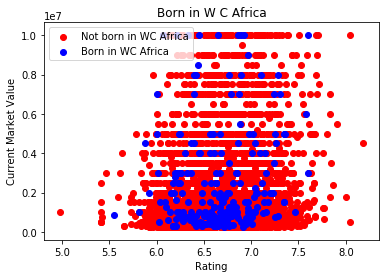

In [239]:
plt.scatter(
    df_allc[df_allc['wc_africa'] == 0].Rating,
    df_allc[df_allc['wc_africa'] == 0].current_market_value,
    color='red'
)
plt.scatter(
    df_allc[df_allc['wc_africa'] == 1].Rating,
   df_allc[df_allc['wc_africa'] == 1].current_market_value,
    color='blue'
)
plt.legend(['Not born in WC Africa', 'Born in WC Africa'])
plt.title('Born in W C Africa')
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.show()

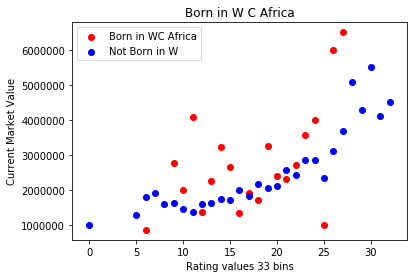

In [240]:
plt.scatter(
    Avg[Avg['wc_africa'] == 1].binned_values,
    Avg[Avg['wc_africa'] == 1].current_market_value,
    color='red'
)
plt.scatter(
    Avg[Avg['wc_africa'] == 0].binned_values,
   Avg[Avg['wc_africa'] == 0].current_market_value,
    color='blue'
)
plt.legend(['Born in WC Africa', 'Not Born in W'])
plt.title('Born in W C Africa')
plt.xlabel('Rating values 33 bins')
plt.ylabel('Current Market Value')
plt.show()

In [241]:
#create new data frame for middle rating range
Avg_rc = Avg[Avg['binned_values'] >= 9]
Avg_rc = Avg[Avg['binned_values'] <= 24]

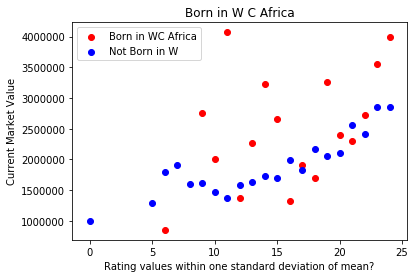

In [242]:
plt.scatter(
    Avg_rc[Avg_rc['wc_africa'] == 1].binned_values,
    Avg_rc[Avg_rc['wc_africa'] == 1].current_market_value,
    color='red'
)
plt.scatter(
    Avg_rc[Avg_rc['wc_africa'] == 0].binned_values,
   Avg_rc[Avg_rc['wc_africa'] == 0].current_market_value,
    color='blue'
)
plt.legend(['Born in WC Africa', 'Not Born in W'])
plt.title('Born in W C Africa')
plt.xlabel('Rating values within one standard deviation of mean?')
plt.ylabel('Current Market Value')
plt.show()

In [243]:
Avg_rc.describe()

,binned_values,current_market_value
count,38.000000,3.800000e+01
mean,14.736842,2.153287e+06
std,6.038991,7.718475e+05
min,0.000000,8.500000e+05
25%,10.250000,1.621087e+06
50%,15.000000,1.991124e+06
75%,19.750000,2.629905e+06
max,24.000000,4.071429e+06


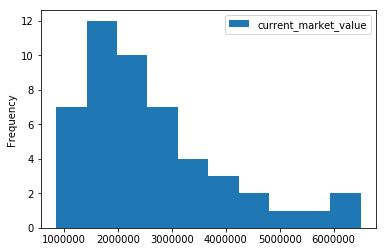

In [244]:
Avg[['current_market_value']].plot(kind='hist')

In [245]:
Avg_wcaf = Avg[Avg['wc_africa']==True]

In [246]:
Avg_wcaf.describe()

,binned_values,current_market_value
count,20.00000,2.000000e+01
mean,17.40000,2.791551e+06
std,6.09918,1.497612e+06
min,6.00000,8.500000e+05
25%,12.75000,1.850298e+06
50%,17.50000,2.524603e+06
75%,22.25000,3.331875e+06
max,27.00000,6.500000e+06


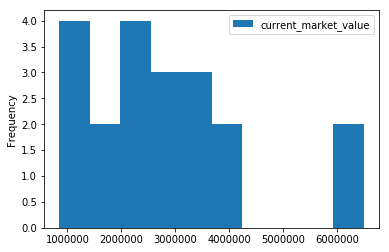

In [247]:
Avg_wcaf[['current_market_value']].plot(kind='hist', bins=10)

In [248]:
Avg_nwcaf = Avg[Avg['wc_africa']==False]

In [249]:
Avg_nwcaf.describe()

,binned_values,current_market_value
count,29.000000,2.900000e+01
mean,17.862069,2.484131e+06
std,8.777911,1.193068e+06
min,0.000000,1.000000e+06
25%,11.000000,1.625421e+06
50%,18.000000,2.056624e+06
75%,25.000000,2.850000e+06
max,32.000000,5.500000e+06


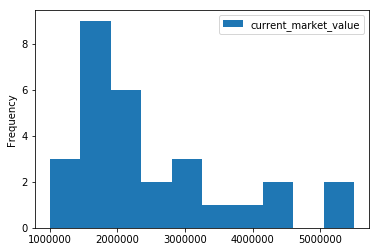

In [250]:
Avg_nwcaf[['current_market_value']].plot(kind='hist', bins= 10)

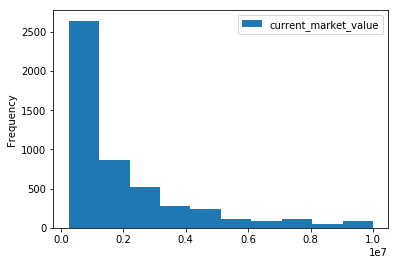

In [251]:
df_allc[['current_market_value']].plot(kind='hist', bins=10)

In [252]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5)
X = Avg[['current_market_value', 'binned_values']]
Y = Avg.wc_africa
neighbors.fit(X,Y)

## Predict whether player is born in w africa if he is valued at 4 million and in the rating bin of 32 (rated highly).
neighbors.predict([[4000000, 32]])

array([False], dtype=bool)

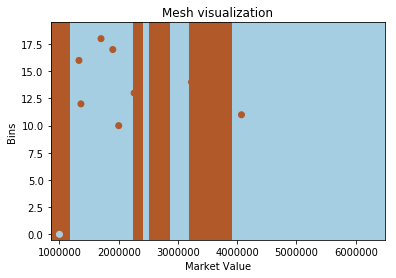

In [253]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 20

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Market Value')
plt.ylabel('Bins')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

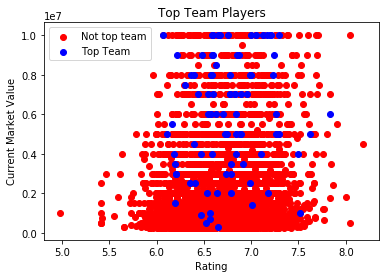

In [256]:
#now try with top team data
plt.scatter(
    df_allc[df_allc['top_team'] == 0].Rating,
    df_allc[df_allc['top_team'] == 0].current_market_value,
    color='red'
)
plt.scatter(
    df_allc[df_allc['top_team'] == 1].Rating,
   df_allc[df_allc['top_team'] == 1].current_market_value,
    color='blue'
)
plt.legend(['Not top team', 'Top Team'])
plt.title('Top Team Players')
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.show()

In [257]:
Avg_tt=df_allc.groupby(['binned_values','top_team'], as_index=False)['current_market_value'].mean()

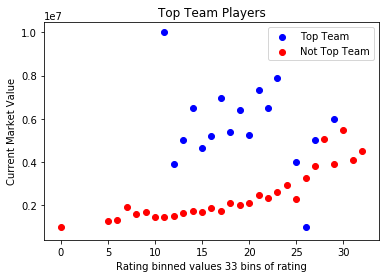

In [259]:
plt.scatter(
    Avg_tt[Avg_tt['top_team'] == 1].binned_values,
    Avg_tt[Avg_tt['top_team'] == 1].current_market_value,
    color='blue'
)
plt.scatter(
    Avg_tt[Avg_tt['top_team'] == 0].binned_values,
   Avg_tt[Avg_tt['top_team'] == 0].current_market_value,
    color='red'
)
plt.legend(['Top Team', 'Not Top Team'])
plt.title('Top Team Players')
plt.xlabel('Rating binned values 33 bins of rating')
plt.ylabel('Current Market Value')
plt.show()

In [262]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5)
X = Avg_tt[['current_market_value', 'binned_values']]
Y = Avg_tt.top_team
neighbors.fit(X,Y)

## Predict whether player is from a top team if he is valued at 4 million and in the rating bin of 32 (rated highly).
neighbors.predict([[4000000, 32]])

array([0])

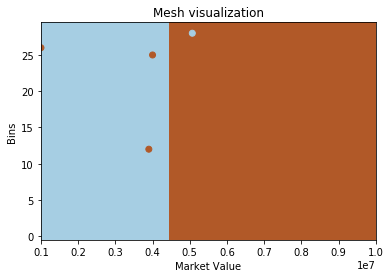

In [265]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 10

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Market Value')
plt.ylabel('Bins')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()